### Importing the Required Libraries

In [58]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.layers import Activation, Dropout, Flatten, Dense

### Loading the dataset into Train and Test set

In [62]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

### Splitting the dataset into Train and Validation set. Along with that scaling the data

In [63]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.

In [64]:
print(X_valid.shape)
print(X_train.shape)

(5000, 28, 28)
(55000, 28, 28)


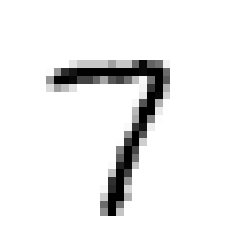

In [65]:
# lets  visualize the dataset

plt.imshow(X_train[100], cmap='binary')
plt.axis("off")
plt.show()

### Reshaping the Images

In [66]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_valid = X_valid.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

print(X_valid.shape)
print(X_train.shape)
print(X_test.shape)

(5000, 28, 28, 1)
(55000, 28, 28, 1)
(10000, 28, 28, 1)


### Converting the target data to categorical form

In [67]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

### Creating the model

In [68]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 64)         

In [70]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

### Finally fitting the model with 5 epoches

In [71]:
Epoches = 5
Validation_set = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs = Epoches, validation_data = Validation_set, batch_size=32)

Epoch 1/5
1719/1719 [==============================] - 41s 23ms/step - loss: 0.5181 - accuracy: 0.8324 - val_loss: 0.0781 - val_accuracy: 0.9758
Epoch 2/5
1719/1719 [==============================] - 39s 23ms/step - loss: 0.0856 - accuracy: 0.9724 - val_loss: 0.0820 - val_accuracy: 0.9770
Epoch 3/5
1719/1719 [==============================] - 38s 22ms/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 0.0712 - val_accuracy: 0.9800
Epoch 4/5
1719/1719 [==============================] - 38s 22ms/step - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0584 - val_accuracy: 0.9844
Epoch 5/5
1719/1719 [==============================] - 38s 22ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0630 - val_accuracy: 0.9828


### Saving the model for futher use

In [72]:
model.save('mnist.h5')

### Evaluating the model on test dataset

In [74]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0662 - accuracy: 0.9803


[0.06621991842985153, 0.9803000092506409]

### Visualizing the loses and Accuracy

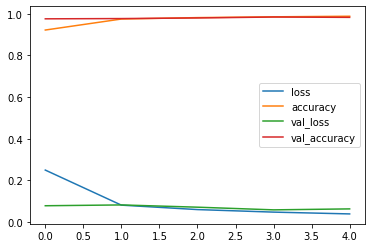

In [76]:
import pandas as pd
pd.DataFrame(history.history).plot()

### Let's predict the unseen data and see how our model works

In [117]:
from keras.preprocessing.image import img_to_array , load_img

In [119]:
# predioct the images 
def read_image(file_path):
    print('[INFO] loading and preprocessing image…') 
    image = load_img(file_path, target_size=(28, 28), grayscale=True) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image

def test_single_image(path):
    
    images = read_image(path)
    preds = model.predict_proba(images)
   
    print('Final Decision:')
    class_predicted = model.predict_classes(images)
    print(class_predicted)
    return load_img(path)

path = 'C:/Users/Swati Panchal/Downloads/digit_dataset/testSet/img_6198.jpg'
test_single_image(path)  

[INFO] loading and preprocessing image…
Final Decision:
[6]
